#  Written digit recogniser (MNIST) - neural network

This neural network was reimplimented from this youtube video https://www.youtube.com/watch?v=w8yWXqWQYmU

The MNIST database can be found here https://www.kaggle.com/competitions/digit-recognizer
It is a simple neural network with 3 layers: an input layer, 1 hidden layer and an output layer. 

It uses the MNIST database to make predictions on handwritten numbers from 0-9 (10 labels). 

Each image is a matrix of 784 pixel values (28x28 image)

There are 42000 images/examples

As I am starting a neural networks class I have written descriptions for every step in this project to aid my learning

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Load data
The pixel matrix is divided by 255 as each pixel has a value between 0 & 255, 0 is black & 255 is white so dividing each pixel value by 255 scales the data by giving each a value between 0 and 1 

In [2]:
data = pd.read_csv('train.csv')
data = np.array(data) # creates a 785 x n_examples matrix (784 columns for pixels + 1 column for labels 0-9)
n_examples, pixel = data.shape # creates a variable for the number of examples and pixels
np.random.shuffle(data)

data_train = data[1000:n_examples].T # transpose matrix so pixels are rows
Y_train = data_train[0] # label vector
X_train = data_train[1:pixel] # pixels matrix
X_train = X_train / 255 
X_pixel,n_examplesX = X_train.shape

data_test = data[0:1000].T
Y_test = data_test[0]
X_test = data_test[1:pixel]
X_test = X_test / 255


## Test that data is loaded and labelled correctly

In [3]:
X_train.shape # matrix of 784 rows pixels x 41000 columns examples

(784, 41000)

In [4]:
Y_train.shape # vector of 42000 labels which correspond to 41000 examples of 784 pixel combinations

(41000,)

In [5]:
n_examples

42000

In [6]:
pixel

785

# Variables/matrices and their dimensions
(rows x columns)

### Forward propagation
$ A^{0} $ = X = 784 x n_examples = input

$ Z^{1} $ = 10 x n_examples = first hidden layer

$ A^{1} $ = 10 x n_examples = ReLU activation function applied in first hidden layer

$ W^{1} $ = 10 x 784 = weight in first hidden layer

$ B^{1} $ = 10 x 1 = bias in first hidden layer 

$ Z^{2} $ = 10 x n_examples = output

$ A^{2} $ = 10 x n_examples = softmax function applied to output

$ W^{2} $ = 10 x 10 = weight applied to output

$ B^{2} $ = 10 x 1 = bias applied to output


### Backwards propagation
$ dZ^{2} $ = 10 x n_examples = applied to output

$ dW^{2} $ = 10 x 10

$ db^{2} $ = 10 x 1

$ dZ^{1} $ = 10 x n_examples

$ dW^{1} $ = 10 x 784

$ db^{1} $ = 10 x 1

alpha = learning rate




## Forward Propagation

1. $ A^{0} $ is computed via a random weight and bias, $ W^{1} $ & $ b^{1} $ which are arrays with random numbers between -0.5 and 0.5  which then becomes $ Z^{1} $

    $ Z^{1} = W^{1}\cdot A^{0} + b^{1} $
    

2. $ Z^{1} $ is passed through an activation function, ReLU in this case, and becomes $ A^{1} $

    $ A^{1} $ = ReLU($ Z^{1} $) 
    
    ### ReLU Activation Function
    
    <img src="1_DfMRHwxY1gyyDmrIAd-gjQ.png" width="500" height="500">
 
 


3. $ A^{1} $ is then computed using a different weight and bias 
    
    $ Z^{2} $ = $ W^{2}\cdot A^{1} + b^{2} $
    
    
4. $ Z^{2} $ is passed through a different activation function, softmax

    $ A^{2} $ = softmax($ Z^{2} $)
    
    ### The softmax function returns a probability 
    <img src="0ab139bc-3ff6-49d2-8b36-dcc98ef31102.png" width="300" height="300">
    
    
Softmax function takes the exponentials of each number in the matrix $ Z^{2} $ and sums the exponentials of them

The exponential of each number is then divided by the previous sum to form a probability - all numbers will be between 0 and 1

the highest probability will be the closest prediction to which label matches the matrix of pixels


at this point the numbers generated are taken from random guesses

In [7]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5 # 1st weight parameter, returns matrix of shape 10x784 (10 digits, 784 pixels) with random numbers between -0.5 and 0.5
    b1 = np.random.rand(10, 1) - 0.5 # 1st bias parameter
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z): # ReLU activation function returns Z if Z > 0 and 0 if Z < 0
    return np.maximum(Z, 0) 

def softmax(Z): # softmax activation function returns probability
    return np.exp(Z) / sum(np.exp(Z))

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2


## Backwards Propagation

**Back propogatoin starts from the second/output layer. It takes the random numbers and tries to form weights and biases that have a higher probability of forming the correct answer**


1. The first error variable of backprop takes the prediction (output) and subtracts the value of the correct label, so it computes how much the prediction deviated from label

    $ dZ^{2} $ = $ A^{2} - Y $

    Y is one hot encoded in order to retrieve the value of the index rather than the index number - the value of the index will be changed to either 1 or 0


2. The derivative of the weight applied to the output value (before softmax) with respect to the error is computed, so this computes how much the weight caused a change in the error - this will allow the neural network to change the weight in a systematic way

    $dW^{2} = \frac{1}{nexamples} dZ^{2} A^{1T} $


3. neural network computes the average for how much it deviated from the correct prediction

    $ db^{2} = \frac{1}{nexamples} \sum dZ^{2} $


**It then works on the first/hidden layer**

4. Computes how much the hidden layer contributed to the error in prediction. It multiples the derivative of the first activation function

    $ dZ^{1} = (W^{2T} \cdot dZ^{2})  g'(Z^{1}) $


5. computes the average error of $W^{1}$

    $ \frac{1}{nexamples} \sum dZ^{1} \cdot X^{T} $
    
    
6. computes the average error of $b^{1}$

    $ \frac{1}{nexamples} \sum dZ^{1} $


once these variables are found the parameters are updated

$ W^{1} = W^{1} - \alpha $ x $ dW^{1} $

$ b^{1} = b^{1} - \alpha $ x $ db^{1} $

$ W^{2} = W^{2} - \alpha $ x $ dW^{2} $

$ b^{2} = b^{2} - \alpha $ x $ db^{2} $


$ \alpha $ is the learning rate set by programmer

In [8]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1)) # creates a matrix of zeros, dimensions = amount of examples x amount of labels
    one_hot_Y[np.arange(Y.size), Y] = 1 # goes through every row of matrix one_hot_Y, if the column is y it will be set to 1
    one_hot_Y = one_hot_Y.T # transpose so each column is an example and rows are labels
    return one_hot_Y

def deriv_ReLU(Z): # derivative of ReLU function, for all values below or equal to 0 the slope of the line is 0, for all values 1 and above the slope is 1
    return Z > 0

def back_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y  
    dW2 = 1 / n_examples * dZ2.dot(A1.T)
    db2 = 1 / n_examples * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = 1 / n_examples * dZ1.dot(X.T)
    db1 = 1 / n_examples * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2


## Gradient Descent

neural network starts again with updated parameters

$ A^{2} $ is the output of forward propagation after softmax function applied to $ Z^{2} $ so this is the prediction for which label fits the example matrix

In [9]:
def get_predictions(A2): # since A2 is a 10xn_examples matrix of probabilities this function returns the value with the highest probability 
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size # average correct predictions

def gradient_descent(X, Y, iterations, alpha): # alpha = learning rate
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0: 
            print("Iteration: ", i) 
            print("Accuracy: ", get_accuracy(get_predictions(A2), Y)) # prints accuracy of the prediction every 10th iteration
    return W1, b1, W2, b2


# Train neural network

500 iterations with a 0.1 learning rate

It's accuracy is ~ 0.85 or 85%

In [10]:
# W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 500, 0.1)

With 1000 iterations the NN reaches ~ 0.87 or 87% accuracy

In [11]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 1000, 0.1)

Iteration:  0
[3 6 0 ... 8 8 8] [3 7 5 ... 9 4 2]
Accuracy:  0.10143902439024391
Iteration:  10
[3 5 5 ... 6 8 8] [3 7 5 ... 9 4 2]
Accuracy:  0.13807317073170733
Iteration:  20
[3 5 5 ... 8 8 1] [3 7 5 ... 9 4 2]
Accuracy:  0.20848780487804877
Iteration:  30
[3 3 6 ... 8 8 1] [3 7 5 ... 9 4 2]
Accuracy:  0.27007317073170733
Iteration:  40
[3 3 6 ... 8 8 1] [3 7 5 ... 9 4 2]
Accuracy:  0.3307317073170732
Iteration:  50
[3 3 5 ... 8 8 1] [3 7 5 ... 9 4 2]
Accuracy:  0.3801219512195122
Iteration:  60
[3 3 5 ... 8 8 1] [3 7 5 ... 9 4 2]
Accuracy:  0.4205121951219512
Iteration:  70
[3 3 2 ... 1 8 1] [3 7 5 ... 9 4 2]
Accuracy:  0.45365853658536587
Iteration:  80
[3 3 2 ... 8 8 1] [3 7 5 ... 9 4 2]
Accuracy:  0.4833170731707317
Iteration:  90
[3 3 8 ... 8 8 1] [3 7 5 ... 9 4 2]
Accuracy:  0.5091463414634146
Iteration:  100
[3 3 8 ... 8 8 9] [3 7 5 ... 9 4 2]
Accuracy:  0.5339512195121952
Iteration:  110
[3 3 8 ... 8 8 9] [3 7 5 ... 9 4 2]
Accuracy:  0.5567560975609757
Iteration:  120
[3 3 8

# Run neural network and print out predictions

In [12]:
def make_predictions(X, W1, b1, W2, b2):
    X_pixel, X_pixel, X_pixel, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28,28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [3]
Label:  3


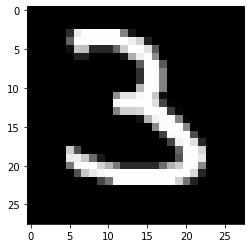

In [13]:
test_prediction(236, W1, b1, W2, b2)

# Run neural network on test data

accuracy ~ 89% on test data

In [15]:
test_predictions = make_predictions(X_test, W1, b1, W2, b2)
get_accuracy(test_predictions, Y_test)

[2 5 9 0 3 7 0 1 1 3 5 6 6 6 2 0 9 6 7 5 1 9 6 1 0 0 6 2 4 6 0 3 1 7 4 5 6
 6 1 1 5 5 0 5 2 6 5 2 0 1 1 1 8 3 7 0 4 1 6 4 5 7 3 3 1 7 3 2 4 3 3 4 1 7
 8 1 7 7 8 8 9 8 8 5 3 8 0 9 3 3 8 0 1 1 8 4 0 6 1 0 1 2 8 0 7 9 1 8 9 7 8
 3 1 9 4 9 2 9 2 8 6 2 7 4 4 7 9 3 8 6 7 5 0 8 4 5 9 0 9 0 3 8 9 6 5 8 5 7
 5 1 7 7 7 8 2 5 1 0 7 0 6 7 1 8 7 5 6 0 1 8 1 1 3 6 6 7 6 3 1 6 0 6 9 2 9
 9 5 1 3 4 7 6 8 5 9 1 3 2 6 4 9 7 2 5 7 9 1 7 9 0 6 8 7 8 7 1 6 6 0 6 9 1
 4 9 8 2 0 9 4 7 7 3 2 4 9 5 0 9 1 5 0 3 7 2 3 7 6 4 1 8 2 1 6 2 5 3 9 6 1
 6 9 8 8 9 2 0 8 7 3 9 9 0 1 8 4 1 4 0 6 4 0 2 9 4 7 4 6 7 5 0 6 6 0 2 1 2
 6 9 2 8 7 0 5 8 5 3 1 1 0 8 9 0 0 6 6 4 2 4 4 4 2 6 6 2 8 5 2 6 1 9 9 0 7
 5 7 5 2 1 8 0 3 4 4 3 8 3 9 7 2 8 8 5 8 1 9 2 9 9 0 0 4 6 3 5 4 8 2 6 2 7
 5 2 4 0 8 9 2 6 2 1 1 0 9 9 6 3 9 7 9 3 7 2 1 0 4 1 3 5 9 9 1 4 4 7 4 9 0
 5 1 0 4 1 6 7 2 1 9 9 1 4 4 4 9 8 1 4 4 3 7 5 0 6 5 3 8 9 1 0 8 7 3 8 0 5
 4 8 7 5 4 5 0 1 1 2 1 5 9 9 2 2 8 7 1 4 0 6 0 5 5 7 3 8 6 8 9 0 1 6 0 9 1
 8 7 5 2 2 1 4 7 0 9 2 7 

0.892

# Error Analysis

These are some cases where the NN made incorrect predictions

As I learn more I will come back and improve this NN

<img src="Screenshot 2022-10-02 at 10.58.59.png" width="300" height="300"> 
<img src="Screenshot 2022-10-02 at 10.59.11.png" width="300" height="300"> 
<img src="Screenshot 2022-10-02 at 10.59.50.png" width="300" height="300">